In [ ]:
#Bài 1
import numpy as np
signals = np.array([[1,2],[3,4],[10,0]])
sample = np.array([3,-1])
np.inner(signals, sample)

array([ 1,  5, 30])

In [ ]:
#Bài 1.1
import numpy as np
A = np.array([0,0,-1,2,3,-1,0,1,-1,-1])
search_vector = np.array([0,1,-1])
len(A), len(search_vector)
B = np.array([1])
B = np.resize(B, (len(A)-len(search_vector)+1, len(search_vector)))
B = np.asmatrix(B)
for i in range(len(A)-len(search_vector)+1):
  for j in range(len(search_vector)):
    B[i,j] = A[i+j]
C = np.inner(B, search_vector)
for i in range(len(A)-len(search_vector)+1):
  if ( C[0,i] == np.inner(search_vector, search_vector) ):
    print (i, B[i])

6 [[ 0  1 -1]]


In [42]:
#Bài 1.2
from PIL import Image, ImageDraw
img = Image.open("/content/drive/MyDrive/pngtree-technology-earth-clip-art-png-image_2458796.jpg")
img.height
img.width
img.mode
img = img.convert("RGB")
new_width = int(img.width / 2)
new_height = int(img.height / 2)
new_img = img.resize((new_width, new_height),Image.Resampling.LANCZOS)
new_img.save("/content/drive/MyDrive/pngtree-technology-earth-clip-art-png-image_2458796.jpg")
input_image = Image.open("/content/drive/MyDrive/pngtree-technology-earth-clip-art-png-image_2458796.jpg")
input_pixels = input_image.load()
box_kernel = [[1 / 9, 1 / 9, 1 / 9],
 [1 / 9, 1 / 9, 1 / 9],
 [1 / 9, 1 / 9, 1 / 9]]
kernel = box_kernel
offset = len(kernel) // 2
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)
for x in range(offset, input_image.width-offset):
  for y in range(offset, input_image.height-offset):
    acc = [0, 0, 0]
    for a in range (len (kernel)):
      for b in range (len (kernel)):
        xn = x+a - offset
        yn = y + b - offset
        pixel = input_pixels[xn, yn]
        acc [0] += pixel [0] * kernel [a] [b]
        acc [1] += pixel [1] * kernel [a] [b]
        acc [2] += pixel [2] * kernel [a] [b]
    draw.point((x, y),(int(acc[0]), int(acc[1]), int (acc [2])))
output_image.save("/content/drive/MyDrive/pngtree-technology-earth-clip-art-png-image_2458796.jpg")

In [ ]:
#Bài 2.1
import numpy as np
A = np.array([[0,0,1.0/2, 1.0/2],[1.0/3,0,0,0],[1.0/3,0,0,1.0/2],[1.0/3,1.0,1.0/2,0]])
x = np.array([1,1,1,1])
x = np.dot(A, x)
print(x)

[1.         0.33333333 0.83333333 1.83333333]


In [ ]:
#Bài 2.2
A = np.array([[0,0,1.0/2, 0.0],
 [1.0/3,0,0,0],
 [1.0/3,0,0,0.0],
 [1.0/3,1.0,1.0/2,0]])
for i in range(5):
 x = np.dot(A, x)
 print (i+1, x)
 np.max(x)

1 [5.35836763e-05 4.28669410e-05 4.28669410e-05 2.03617970e-04]
2 [2.14334705e-05 1.78612254e-05 1.78612254e-05 8.21616369e-05]
3 [8.93061271e-06 7.14449017e-06 7.14449017e-06 3.39363283e-05]
4 [3.57224508e-06 2.97687090e-06 2.97687090e-06 1.36936062e-05]
5 [1.48843545e-06 1.19074836e-06 1.19074836e-06 5.65605472e-06]


In [ ]:
gauss_kernel =(1/256) * np.array([
    [1,  4,  6,  4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1,  4,  6,  4, 1]
])


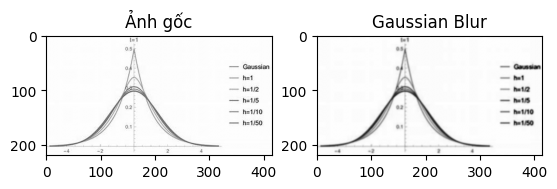

In [47]:
#Bài tập chương 7
# Bài 1
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển sang ảnh xám
img = cv2.imread("/content/sample_data/OIP.jpg", cv2.IMREAD_GRAYSCALE)

# Tạo kernel Gaussian 5x5
gaussian_kernel = (1/256) * np.array([
    [1,  4,  6,  4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1,  4,  6,  4, 1]
])

# Áp dụng làm mờ
blurred = cv2.filter2D(img, -1, gaussian_kernel)

# Hiển thị ảnh gốc và ảnh đã làm mờ
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Ảnh gốc")

plt.subplot(1, 2, 2)
plt.imshow(blurred, cmap='gray')
plt.title("Gaussian Blur")

plt.show()

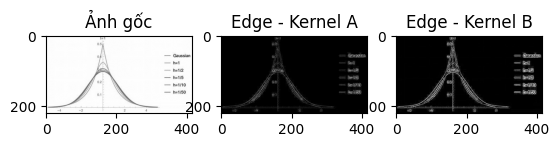

In [48]:
# Kernel a: rút xương kiểu 1
kernel_a = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
])

# Kernel b: rút xương kiểu 2
kernel_b = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Áp dụng các kernel lên ảnh gốc
a = cv2.filter2D(img, -1, kernel_a)
b = cv2.filter2D(img, -1, kernel_b)

# Hiển thị kết quả
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Ảnh gốc")

plt.subplot(1, 3, 2)
plt.imshow(a, cmap='gray')
plt.title("Edge - Kernel A")

plt.subplot(1, 3, 3)
plt.imshow(b, cmap='gray')
plt.title("Edge - Kernel B")

plt.show()
